## Regression

#### cross validation

`Cross validation` set is a dubset (next to train and test) made to additionally test the mode performance by testing the best choice of `engineered features` or `model architecture`

Only the final model shouls be tested on the `test set`

In [42]:
import pandas as pd
import numpy as np
import tensorflow as tf
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [9]:
#np.save('outfile', data)
data=np.load('data/data2.npy')

In [13]:
x=data[:,0]
y=data[:,1]
x=np.expand_dims(x,axis=1)
y=np.expand_dims(y,axis=1)

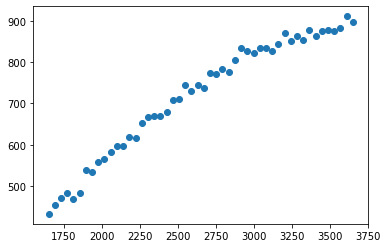

In [15]:
plt.scatter(x,y)

In [20]:
x_train,x_,y_train,y_=train_test_split(x,y,test_size=0.4,random_state=1)
x_cv,x_test,y_cv,y_test=train_test_split(x_,y_,test_size=0.5,random_state=1)
print(f'training: {x_train.shape}, {y_train.shape}' )
print(f'cv: {x_cv.shape}, {y_cv.shape}' )
print(f'test: {x_test.shape}, {y_test.shape}' )

training: (30, 1), (30, 1)
cv: (10, 1), (10, 1)
test: (10, 1), (10, 1)


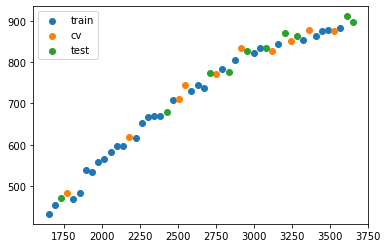

In [22]:
plt.scatter(x_train,y_train,label='train')
plt.scatter(x_cv,y_cv,label='cv')
plt.scatter(x_test,y_test,label='test')
plt.legend()

#### feature scaling

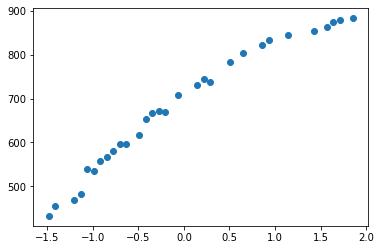

In [28]:
scaler_linear=StandardScaler()
x_train_scaled=scaler_linear.fit_transform(x_train)
plt.scatter(x_train_scaled,y_train)

In [30]:
linear_model=LinearRegression()
linear_model.fit(x_train_scaled,y_train)

LinearRegression()

#### evalueate model

In [36]:
y_hat=linear_model.predict(x_train_scaled)
error=mean_squared_error(y_train,y_hat)/2
print(f'scikit error: {error}')
total_squared_error=0
for i in range(len(y_hat)):
    squared_error=(y_hat[i]-y_train[i])**2
    total_squared_error+=squared_error
mse=total_squared_error/(2*len(y_hat))
print(f'for loop error: {mse[0]}')

scikit error: 406.1814264310123
for loop error: 406.1814264310123


#### scaling cv

In [38]:
x_cv_scaled=scaler_linear.transform(x_cv)
print(f'mean: {scaler_linear.mean_}')
print(f'scale: {scaler_linear.scale_}')

mean: [2504.06166667]
scale: [574.85344565]


In [40]:
y_hat=linear_model.predict(x_cv_scaled)
error=mean_squared_error(y_cv,y_hat)/2
print(f'scikit error: {error}')

scikit error: 551.7633686764401


#### adding polynomial features

In [51]:
poly=PolynomialFeatures(degree=2,include_bias=False)
x_train_mapped=poly.fit_transform(x_train)
x_train_mapped[:3]

array([[3.32447000e+03, 1.10521008e+07],
       [2.34488000e+03, 5.49846221e+06],
       [3.48773000e+03, 1.21642606e+07]])

In [52]:
scaler_poly=StandardScaler()
x_train_mapped_scaled=scaler_poly.fit_transform(x_train_mapped)
x_train_mapped_scaled[:3]

array([[ 1.42716085,  1.47236975],
       [-0.27690826, -0.36461578],
       [ 1.71116367,  1.84024054]])

In [53]:
model=LinearRegression()
model.fit(x_train_mapped_scaled,y_train)

LinearRegression()

In [55]:
y_hat=model.predict(x_train_mapped_scaled)
error=mean_squared_error(y_train,y_hat)/2
print(f'scikit error train: {error}')

scikit error train: 49.115763074720654


In [57]:
x_cv_mapped=poly.transform(x_cv)
x_cv_mapped_scaled=scaler_poly.transform(x_cv_mapped)
y_hat=model.predict(x_cv_mapped_scaled)
error=mean_squared_error(y_cv,y_hat)/2
print(f'scikit error cv: {error}')

scikit error cv: 87.6946643843581


In [66]:
error_train=np.zeros(10)
error_cv=np.zeros(10)
for i in range(1,11):
    poly=PolynomialFeatures(degree=i,include_bias=False)
    scaler_poly=StandardScaler()
    x_train_mapped=poly.fit_transform(x_train)
    x_train_mapped_scaled=scaler_poly.fit_transform(x_train_mapped)
    x_cv_mapped=poly.transform(x_cv)
    x_cv_mapped_scaled=scaler_poly.transform(x_cv_mapped)
    model=LinearRegression()
    model.fit(x_train_mapped_scaled,y_train)
    y_hat=model.predict(x_train_mapped_scaled)
    error_train[i-1]=mean_squared_error(y_train,y_hat)/2
    #print(f'scikit error train: {error}')
    y_hat=model.predict(x_cv_mapped_scaled)
    error_cv[i-1]=mean_squared_error(y_cv,y_hat)/2
    #print(f'scikit error cv: {error}')

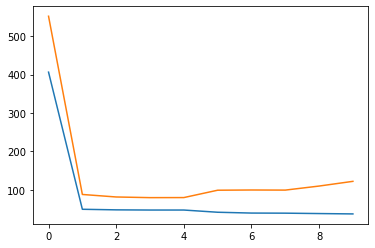

In [67]:
plt.plot(error_train)
plt.plot(error_cv)

## Neural networks